In [ ]:
import pandas as pd
import numpy as np
import glob

In [3]:
# combine all the csv files in directory into one
df_benign = pd.concat([pd.read_csv(f) for f in glob.glob('C:\\Users\\medot\Documents\\Worplace net clsfier\\benign parsed\\*.csv')], ignore_index = True)
# save dataframe to csv
#df_benign.to_csv('C:\\Users\\medot\Documents\\Worplace net clsfier\\benign parsed\\benign.csv', index=False)

In [4]:
df_malicious = pd.concat([pd.read_csv(f) for f in glob.glob('C:\\Users\\medot\Documents\\Worplace net clsfier\\malicious parsed\\*.csv')], ignore_index = True)
# save dataframe to csv
#df_malicious.to_csv('C:\\Users\\medot\Documents\\Worplace net clsfier\\malicious parsed\\malicious.csv', index=False)

In [5]:
# combine two dataframes into one
df = pd.concat([df_benign, df_malicious], ignore_index = True)

In [6]:
# shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
# increase maximum columns to display
pd.set_option('display.max_columns', 100)

In [8]:
features_to_drop = ['Has Module Table', 'Has Assembly Table', 'Has MemberRef','Has MethodDef', 'Has Resources', 'Has TypeDef', 'Has TypeRef', 'Managed Entrypoint Signature Has this pointer', 'Managed Entrypoint Signature Parameter', 'Managed Entrypoint Signature Return value']
# drop features
df = df.drop(features_to_drop, axis=1)

In [3]:
# import pandas as pd
# # read the csv file
# df = pd.read_csv('C:\\Users\\medot\\Documents\\Worplace net clsfier\\combined\\combined.csv')
# # drop the column Has TypeDef inplace
# df.drop('Has TypeDef', axis=1, inplace=True)
# # save the dataframe to csv
# df.to_csv('C:\\Users\\medot\\Documents\\Worplace net clsfier\\combined\\combined.csv', index=False)

In [44]:
# count duplicated in dataframe
df.duplicated().sum()

40339

In [38]:
# drop duplicate in the dataframe inplace
df.drop_duplicates(inplace=True)

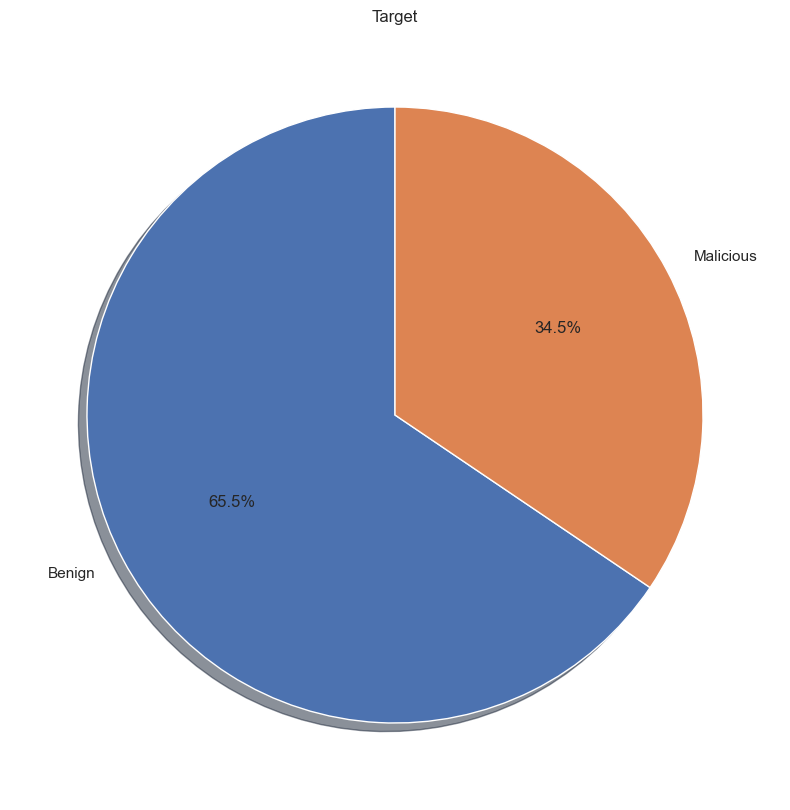

In [39]:
# pie chart Target column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))
plt.pie(df['Target'].value_counts(), labels=['Benign', 'Malicious'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Target')
plt.show()


In [28]:
# move Target column to end of the dataframe
df = df[[c for c in df if c not in ['Target']] + ['Target']]

In [33]:
df.columns

Index(['.NET runtime target version', 'Number of streams',
       'Has .NET resources', 'Is a mixed .NET assembly',
       'Has a native entry point', 'Is a native image',
       'Is a Windows Forms app',
       'Anti analysis NET data directory hidden in PE header',
       'Anti analysis Has extra data at the end of the metadata header',
       'Anti analysis Has fake types that reference each other',
       'Anti analysis Has invalid entries in TypeRef table',
       'Anti analysis Has fake data streams',
       'Anti analysis Has more than one row in Module table',
       'Anti analysis Has more than one row in Assembly table',
       'Anti analysis Has invalid entries in #Strings stream',
       'Managed Entrypoint Method', 'Managed Defined entrypoint type',
       'Managed Entrypoint Namespace',
       'Managed Entrypoint Signature Parameter',
       'Managed Entrypoint Signature Return value',
       'Managed Entrypoint Signature Has this pointer', 'Stream names',
       'All ref

In [34]:
# numebr of columns
print(len(df.columns))

54


In [32]:
df.sample(5)

,.NET runtime target version,Number of streams,Has .NET resources,Is a mixed .NET assembly,Has a native entry point,Is a native image,Is a Windows Forms app,Anti analysis NET data directory hidden in PE header,Anti analysis Has extra data at the end of the metadata header,Anti analysis Has fake types that reference each other,Anti analysis Has invalid entries in TypeRef table,Anti analysis Has fake data streams,Anti analysis Has more than one row in Module table,Anti analysis Has more than one row in Assembly table,Anti analysis Has invalid entries in #Strings stream,Managed Entrypoint Method,Managed Defined entrypoint type,Managed Entrypoint Namespace,Managed Entrypoint Signature Parameter,Managed Entrypoint Signature Return value,Managed Entrypoint Signature Has this pointer,Stream names,All references,Len Strings stream strings,Len US stream strings,Existent metadata tables,Available tables,Module name,Assembly Name,assembly_version_info BuildNumber,assembly_version_info MajorVersion,assembly_version_info MinorVersion,assembly_version_info RevisionNumber,Assembly names,Has ModuleRef,Has ImplMap,Has TypeRef,Referenced Types Names,Has TypeDef,TypeDef Names,Has MethodDef,Method names,Len Possible method entry points,Has MemberRef,memberref_names,Has Event,Has ManifestResource,Resource names,Has Resources,Len Resources,Unmanaged module names,Unmanaged functions,Event names,Target
24730,v2.0.50727,5,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"['#~', '#Strings', '#US', '#GUID', '#Blob']","['DapsterTools', 'mscorlib', 'System.Xml']",100,44,"['Module', 'TypeRef', 'TypeDef', 'MethodDef', ...","['Module', 'TypeRef', 'TypeDef', 'MethodDef', ...",FileFlyerCom.dll,FileFlyerCom,0,0,0,0,"['DapsterTools', 'System.Xml', 'mscorlib']",0,0,1,"['Dapster', 'XmlDocument', 'FileInfoResult', '...",1,"['<Module>', 'fileflyercom']",1,"['.ctor', 'getPureID', 'CallAPI', 'CheckLink',...",0.0,1,"['m_RegEx', 'StatusText', 'get_Length', 'get_F...",0,0,NaN,0,0,NaN,NaN,NaN,1
45973,v2.0.50727,5,True,False,False,False,True,False,False,False,False,False,False,False,False,Main,Program,f221212,(),System.Void,False,"['#~', '#Strings', '#US', '#GUID', '#Blob']","['System', 'System.Drawing', 'mscorlib', 'Syst...",205,18,"['Module', 'TypeRef', 'TypeDef', 'Field', 'Met...","['Module', 'TypeRef', 'TypeDef', 'Field', 'Met...",f221212.exe,f221212,0,1,0,0,"['System.Windows.Forms', 'System', 'mscorlib',...",0,0,1,"['Form', 'ApplicationSettingsBase', 'Object', ...",1,"['<Module>', 'tela_inicial', 'Settings', 'Prog...",1,"['.ctor', 'tela_inicial_Load', 'tela_inicial_F...",1.0,1,"['Dispose', 'Create', 'ReportProgress', 'set_O...",0,1,"['f221212.Properties.Resources.resources', 'f2...",0,2,NaN,NaN,NaN,1
42347,v2.0.50727,5,True,False,False,False,False,False,False,False,False,False,False,False,False,Main,PrinterPeerService,PrinterPeerService,(),System.Void,False,"['#~', '#Strings', '#US', '#GUID', '#Blob']","['System', 'mscorlib', 'System.ServiceProcess'...",107,12,"['Module', 'TypeRef', 'TypeDef', 'Field', 'Met...","['Module', 'TypeRef', 'TypeDef', 'Field', 'Met...",PrinterPeerService.exe,PrinterPeerService,2261,5,0,34952,"['System.Configuration.Install', 'System.Servi...",0,0,1,"['Installer', 'ServiceBase', 'Object', 'Servic...",1,"['<Module>', 'ProjectInstaller', 'PrinterPeerS...",1,"['.ctor', 'InitializeComponent', '.ctor', 'Mai...",0.0,1,"['.ctor', 'set_Account', 'set_Username', 'get_...",0,1,['PrinterPeerService.PrinterPeerService.resour...,0,2,NaN,NaN,NaN,0
17463,v2.0.50727,5,True,False,False,False,True,False,False,False,False,False,False,False,False,,,,System.String[],System.Void,False,"['#~', '#Strings', '#US', '#GUID', '#Blob']","['System.Xml', 'System', 'mscorlib', 'System.W...",1277,6,"['Module', 'TypeRef', 'TypeDef', 'Field', 'Met...","['Module', 'TypeRef', 'TypeDef', 'Field', 'Met...",syncui.exe,syncui,0,1,0,0,"['System', 'System.Xml', 'mscorlib', 'System.W...",1,1,1,"['syncui.exe', 'Component', 'Cancel

In [35]:
# save dataframe to csv
df.to_csv('C:\\Users\\medot\Documents\\Worplace net clsfier\\combined\\combined.csv', index=False)